In [47]:
# this will help in making the Python code more structured automatically (good coding practice)
#!pip install black

#%load_ext nb_black

# library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# remove the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# set the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

from sklearn import metrics

# libraries to build Linear Regression Model
from sklearn.linear_model import LogisticRegression

# libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# libraries to build ensemble models
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier, 
    GradientBoostingClassifier,
    StackingClassifier,
)

# libraries to build xgboost model
from xgboost import XGBClassifier

# library for stacking classifier
from sklearn.ensemble import StackingClassifier

# to tune different models
from sklearn.model_selection import GridSearchCV, train_test_split

# to get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    classification_report,
)
 

In [48]:
# histogram and boxplot for the feature
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="orange"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="Winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="blue", linestyle="-")
    plt.show()  # show the plot

# labeled_barplot
def labeled_barplot(data, feature, perc=False, v_ticks=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    if v_ticks is True:
        plt.xticks(rotation=90)
        
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot

# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()
    
# to plot confusion matrix
def draw_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

# calculate different metric scores of the model - Accuracy, Recall, F1 and Precision
def get_metrics_score(model,flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list=[] 
    
    # predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    # accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    # recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    # precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    # f1_score of the model
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)

    # populate the score_list 
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",train_acc)
        print("Accuracy on test set : ",test_acc)
        print("Recall on training set : ",train_recall)
        print("Recall on test set : ",test_recall)
        print("Precision on training set : ",train_precision)
        print("Precision on test set : ",test_precision)
        print("F1 on training set : ",train_f1)
        print("F1 on test set : ",test_f1)
    return score_list # returning the list with train and test scores
    

In [49]:
# load the file using excel. There are two sheets in the excel. Load the Tourism sheet
df = pd.read_csv("C:/Users/abhis/OneDrive/Desktop/Tourism.csv")

# back up data to preserve the initial version for reference
df_back = df.copy()

In [50]:
# print the data set information as number of rows and columns
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 4888 rows and 20 columns.


In [51]:
# check the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [52]:
# setting the random seed via np.random.seed to get the same random results every time
np.random.seed(1)

# also look at random 10 sample rows
df.sample(n=10)


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3015,203015,0,27.0,Company Invited,1,7.0,Salaried,Female,4,6.0,Basic,3.0,Married,5.0,0,4,1,3.0,Executive,23042.0
1242,201242,0,40.0,Self Enquiry,3,13.0,Small Business,Male,2,3.0,King,4.0,Single,2.0,0,4,1,NaN,VP,34833.0
3073,203073,0,29.0,Self Enquiry,2,15.0,Small Business,Male,4,5.0,Basic,3.0,Married,3.0,0,2,0,2.0,Executive,23614.0
804,200804,0,48.0,Company Invited,1,6.0,Small Business,Male,2,1.0,Super Deluxe,3.0,Single,3.0,0,2,0,0.0,AVP,31885.0
3339,203339,0,32.0,Self Enquiry,1,18.0,Small Business,Male,4,4.0,Deluxe,5.0,Divorced,3.0,1,2,0,3.0,Manager,25511.0
3080,203080,1,36.0,Company Invited,1,32.0,Salaried,Female,4,4.0,Basic,4.0,Married,3.0,1,3,0,1.0,Executive,20700.0
2851,202851,0,46.0,Self Enquiry,1,17.0,Salaried,Male,4,4.0,Basic,3.0,Divorced,5.0,0,5,1,1.0,Executive,21332.0
2883,202883,1,32.0,Company Invited,1,27.0,Salaried,Male,4,4.0,Standard,3.0,Divorced,5.0,0,3,1,1.0,Senior Manager,28502.0
1676,201676,0,22.0,Self Enquiry,1,11.0,Salaried,Male,2,1.0,Basic,4.0,Married,2.0,1,4,1,0.0,Executive,17328.0
1140,201140,0,44.0,Self Enquiry,1,13.0,Small Business,Female,2,3.0,King,3.0,Married,1.0,1,4,1,1.0,VP,34049.0


In [53]:
# creating list of category columns that are not object type
cat_cols = ["CityTier","ProdTaken","NumberOfPersonVisiting","NumberOfChildrenVisiting","PreferredPropertyStar","Passport","PitchSatisfactionScore","OwnCar"]
df[cat_cols] = df[cat_cols].astype("category")

# selecting all object datatypes and converting to category
cols = df.select_dtypes(["object"])
for i in cols.columns:
    df[i] = df[i].astype("category")

# check the dataset for updated datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   category
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   category
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   category
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

In [54]:
# check number of null records
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [55]:
# replace the missing values with median income w.r.t the customer"s designation
df["MonthlyIncome"] = df.groupby(["Designation"])["MonthlyIncome"].transform(lambda x: x.fillna(x.median()))
df["Age"] = df.groupby(["Designation"])["Age"].transform(lambda x: x.fillna(x.median()))

In [56]:
# create list of numerical columns
missing_numerical = df.select_dtypes(include=np.number).columns.tolist()

# remove Age and MonthlyIncome as we have already treated these columns
missing_numerical.remove("MonthlyIncome")
missing_numerical.remove("Age")

# function for replacing with the Median value of the attributes
medianFiller = lambda x: x.fillna(x.median()) 

# apply the function
df[missing_numerical] = df[missing_numerical].apply(medianFiller,axis=0)

In [57]:
#create a list of categorical columns
cat_cols =  df.select_dtypes(["category"])

#get the valuecounts
for i in cat_cols.columns:
    print(cat_cols[i].value_counts())
    print("-"*50)
    print("\n")

0    3968
1     920
Name: ProdTaken, dtype: int64
--------------------------------------------------


Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
--------------------------------------------------


1    3190
3    1500
2     198
Name: CityTier, dtype: int64
--------------------------------------------------


Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------


Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
--------------------------------------------------


3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
--------------------------------------------------


Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
--------------------------------------------------


3.0    

In [58]:
# treating missing values in remaining categorical variables
df["TypeofContact"] = df["TypeofContact"].fillna("Self Enquiry")
df["NumberOfChildrenVisiting"] = df["NumberOfChildrenVisiting"].fillna(1.0)
df["PreferredPropertyStar"] = df["PreferredPropertyStar"].fillna(3.0)

In [59]:
# treating error
df.Gender = df.Gender.replace("Fe Male","Female")

# verify the update
df.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [60]:
# count of null records
df.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [61]:
# summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
Age,4888.0,37.429828,9.149822,18.0,31.00,36.0,43.00,61.0
DurationOfPitch,4888.0,15.362930,8.316166,5.0,9.00,13.0,19.00,127.0
NumberOfFollowups,4888.0,3.711129,0.998271,1.0,3.00,4.0,4.00,6.0
NumberOfTrips,4888.0,3.229746,1.822769,1.0,2.00,3.0,4.00,22.0
MonthlyIncome,4888.0,23546.843903,5266.279293,1000.0,20485.00,22413.5,25424.75,98678.0


In [62]:
# summary of categorical columns
df.describe(include="category").T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4888,2,Self Enquiry,3469
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
NumberOfPersonVisiting,4888,5,3,2402
ProductPitched,4888,5,Basic,1842
PreferredPropertyStar,4888.0,3.0,3.0,3019.0
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466


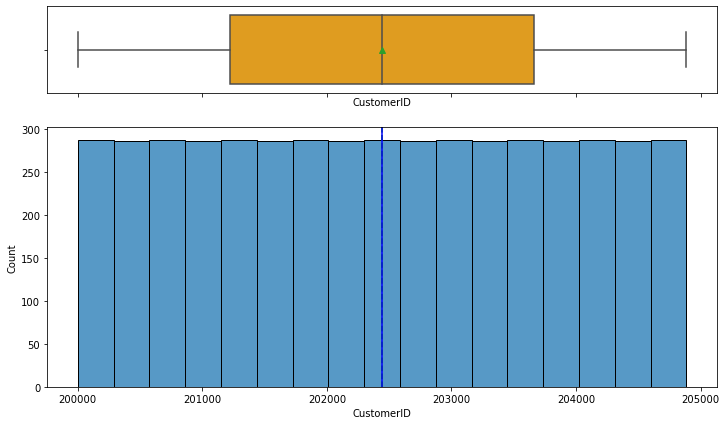

In [63]:
# use the defined function histogram_boxplot to plot the graphs
histogram_boxplot(df,"CustomerID")   

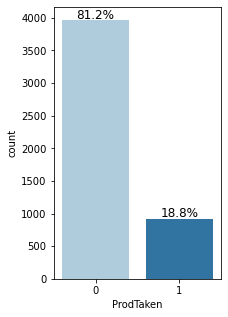

In [64]:
# use label_barplot function to plot the graph
labeled_barplot(df,"ProdTaken", True, False) 

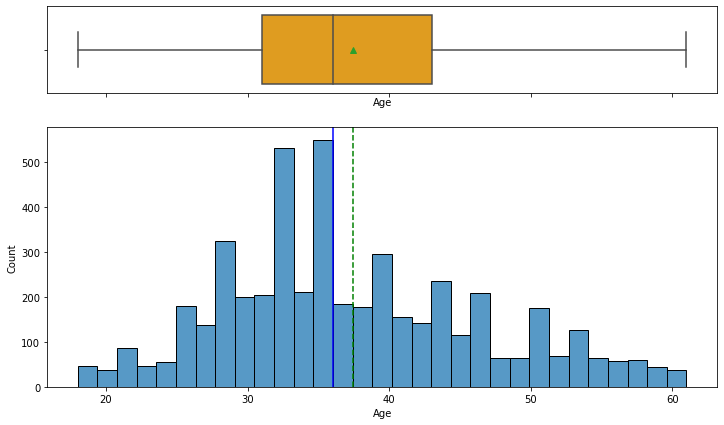

In [65]:
# use the defined function histogram_boxplot to plot the graphs
histogram_boxplot(df,"Age") 

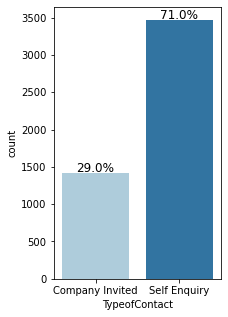

In [66]:
# use label_barplot function to plot the graph
labeled_barplot(df,"TypeofContact",True,False) 

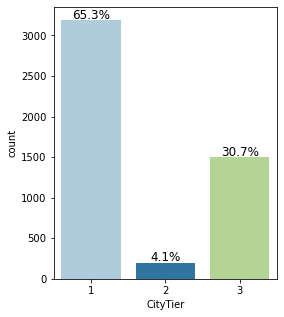

In [67]:
# use label_barplot function to plot the graph
labeled_barplot(df,"CityTier",True,False) 

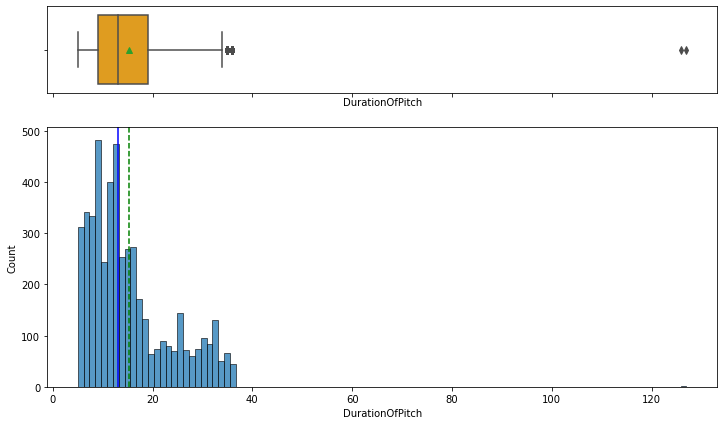

In [68]:
# use the defined function histogram_boxplot to plot the graphs
histogram_boxplot(df,"DurationOfPitch") 

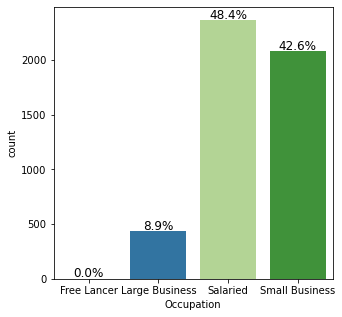

In [69]:
# use label_barplot function to plot the graph
labeled_barplot(df,"Occupation",True, False) 

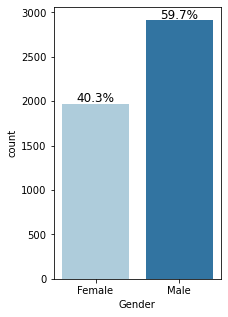

In [70]:
# use label_barplot function to plot the graph
labeled_barplot(df,"Gender",True, False) 

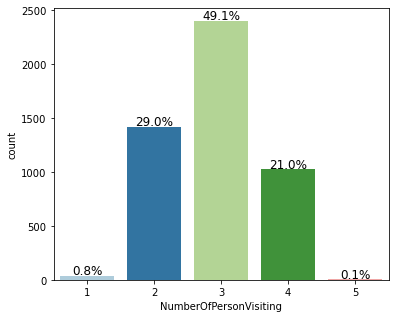

In [71]:
# use label_barplot function to plot the graph
labeled_barplot(df,"NumberOfPersonVisiting",True, False) 

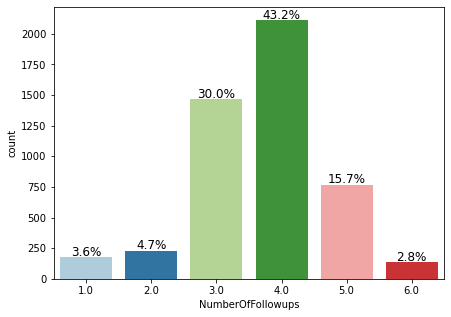

In [72]:
# use label_barplot function to plot the graph
labeled_barplot(df,"NumberOfFollowups",True, False) 

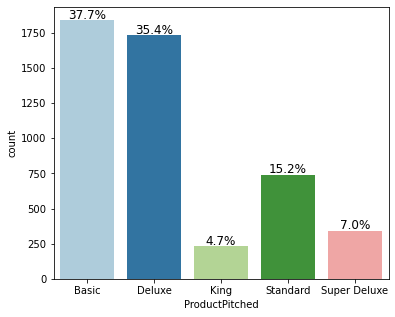

In [73]:
# use label_barplot function to plot the graph
labeled_barplot(df,"ProductPitched",True, False) 

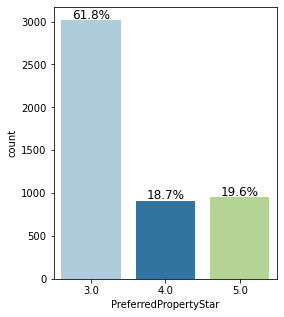

In [74]:
# use label_barplot function to plot the graph
labeled_barplot(df,"PreferredPropertyStar",True, False) 

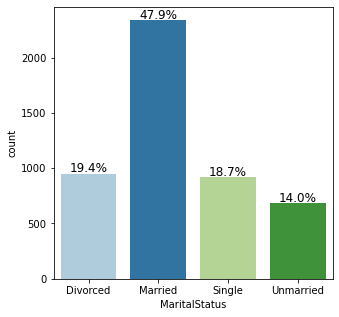

In [75]:
# use label_barplot function to plot the graph
labeled_barplot(df,"MaritalStatus",True, False) 

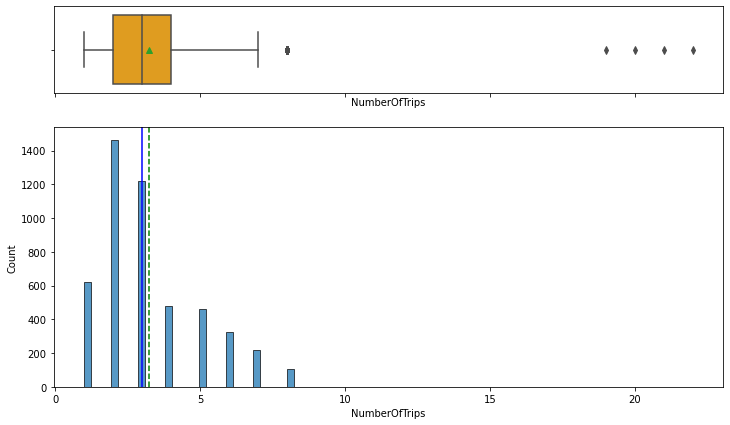

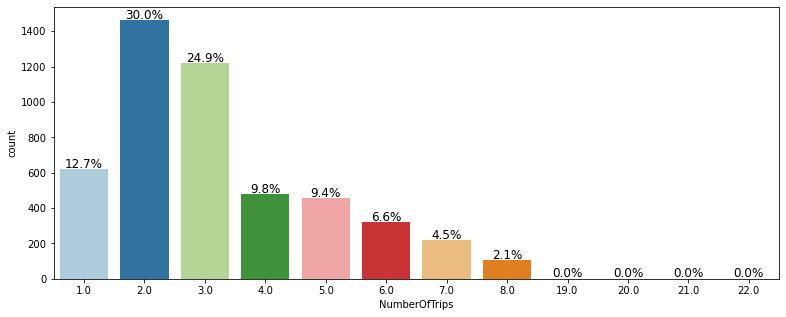

In [76]:
# use the defined function histogram_boxplot to plot the graphs
histogram_boxplot(df,"NumberOfTrips") 

# use label_barplot function to plot the graph
labeled_barplot(df,"NumberOfTrips",True, False) 

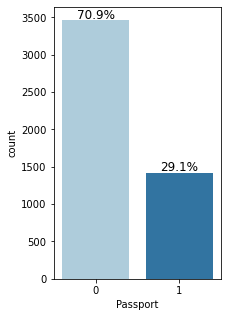

In [77]:
# use label_barplot function to plot the graph
labeled_barplot(df,"Passport",True, False) 

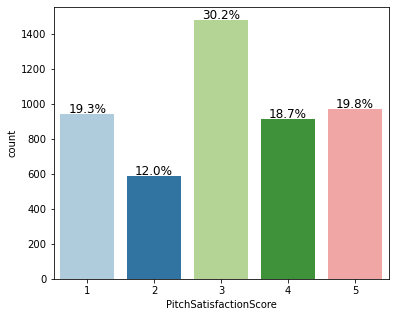

In [78]:
# use label_barplot function to plot the graph
labeled_barplot(df,"PitchSatisfactionScore",True, False) 

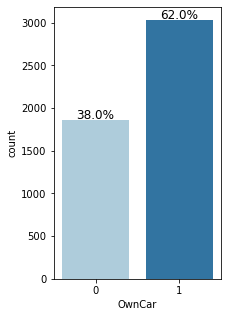

In [79]:
# use label_barplot function to plot the graph
labeled_barplot(df,"OwnCar",True, False) 

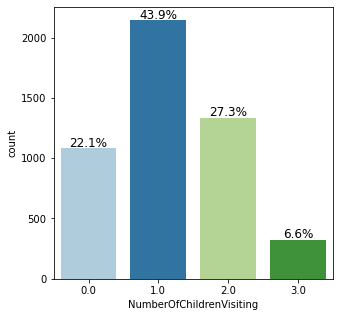

In [80]:
# use label_barplot function to plot the graph
labeled_barplot(df,"NumberOfChildrenVisiting",True, False) 

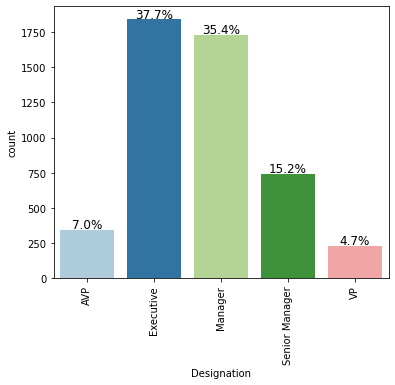

In [81]:
# use label_barplot function to plot the graph
labeled_barplot(df,"Designation",True, True) 

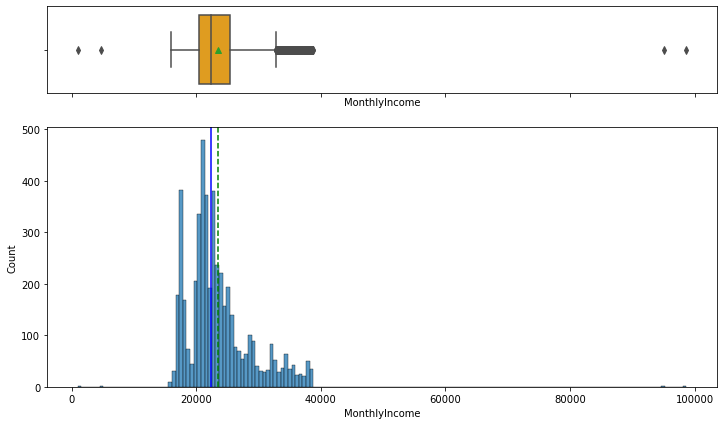

In [82]:
# use the defined function histogram_boxplot to plot the graphs
histogram_boxplot(df,"MonthlyIncome") 

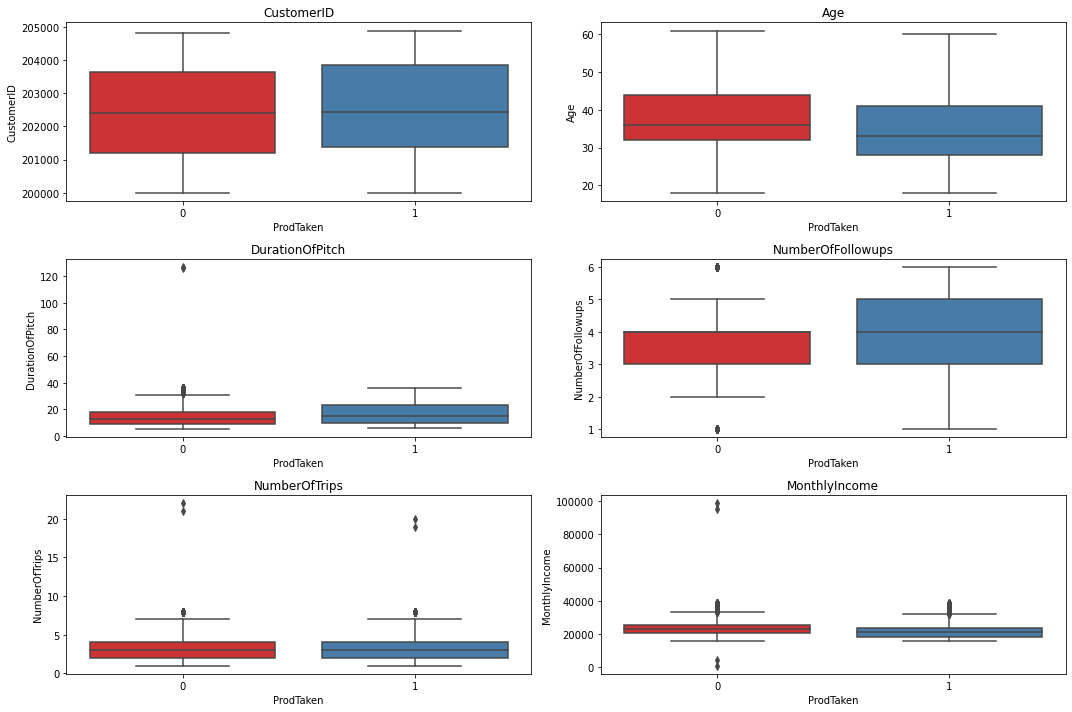

In [83]:
# for all numerical variables with Personal_Loan draw box plots
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15,10))
for i, variable in enumerate(num_cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df["ProdTaken"],df[variable],palette="Set1")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

ProdTaken           0    1   All
TypeofContact                   
All              3968  920  4888
Self Enquiry     2859  610  3469
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


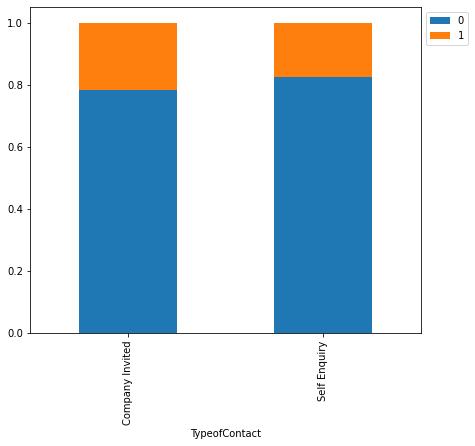

In [84]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "TypeofContact", "ProdTaken")

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


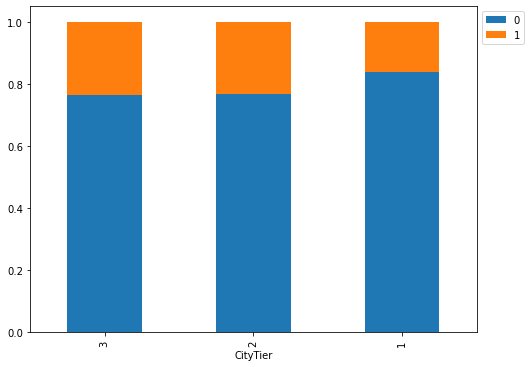

In [85]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "CityTier", "ProdTaken")

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


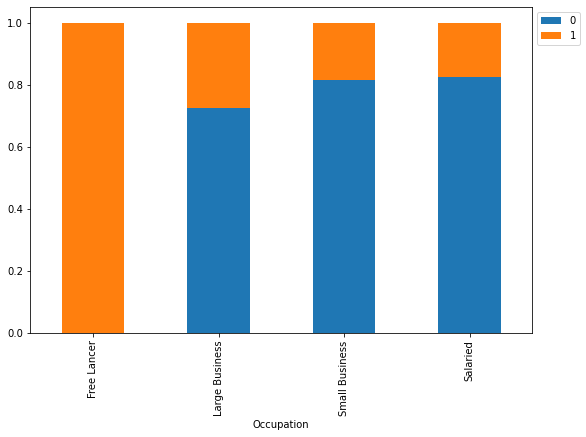

In [86]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "Occupation", "ProdTaken")

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972
------------------------------------------------------------------------------------------------------------------------


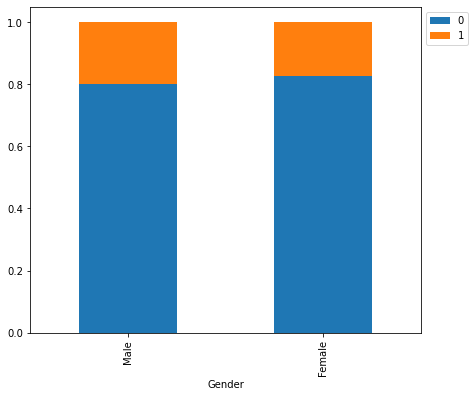

In [87]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "Gender", "ProdTaken")

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


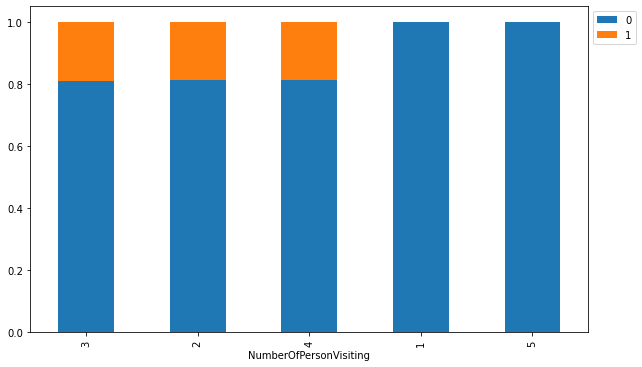

In [88]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "NumberOfPersonVisiting", "ProdTaken")

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


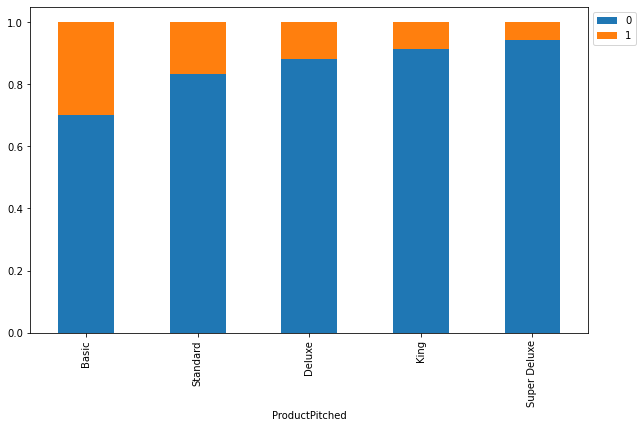

In [89]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "ProductPitched", "ProdTaken")

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3968  920  4888
3.0                    2531  488  3019
5.0                     706  250   956
4.0                     731  182   913
------------------------------------------------------------------------------------------------------------------------


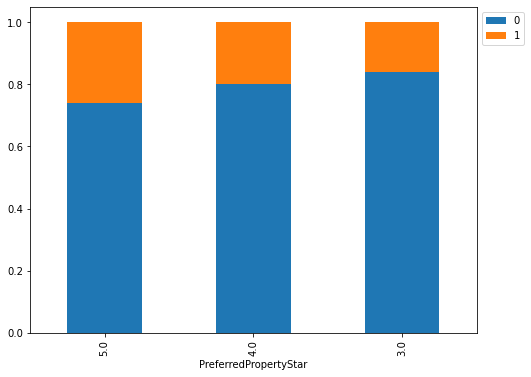

In [90]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "PreferredPropertyStar", "ProdTaken")

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


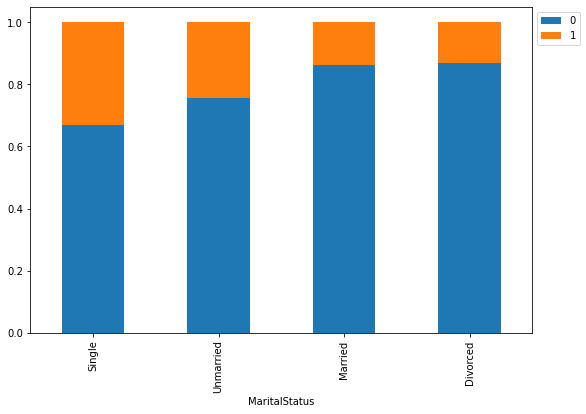

In [91]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "MaritalStatus", "ProdTaken")

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


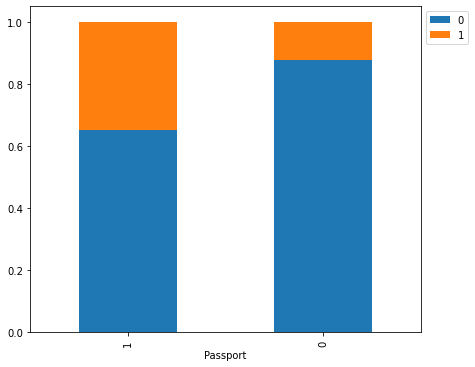

In [92]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "Passport", "ProdTaken")

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3968  920  4888
3                       1162  316  1478
5                        760  210   970
4                        750  162   912
1                        798  144   942
2                        498   88   586
------------------------------------------------------------------------------------------------------------------------


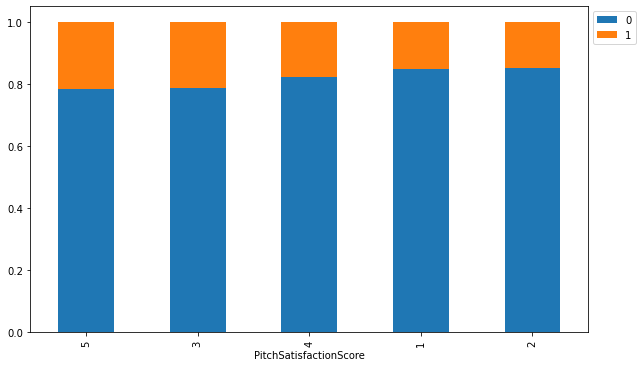

In [93]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "PitchSatisfactionScore", "ProdTaken")

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856
------------------------------------------------------------------------------------------------------------------------


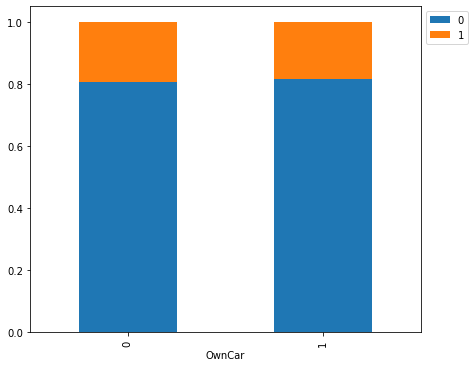

In [94]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "OwnCar", "ProdTaken")

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3968  920  4888
1.0                       1747  399  2146
2.0                       1082  253  1335
0.0                        880  202  1082
3.0                        259   66   325
------------------------------------------------------------------------------------------------------------------------


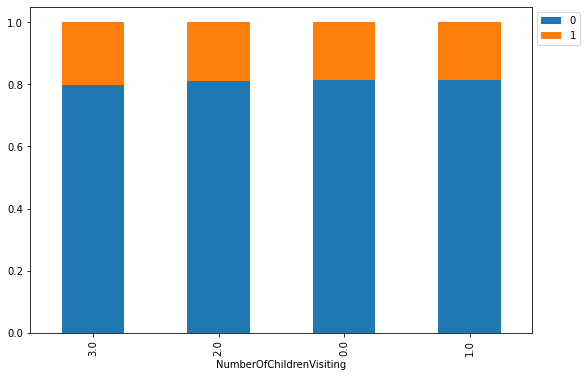

In [95]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "NumberOfChildrenVisiting", "ProdTaken")

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


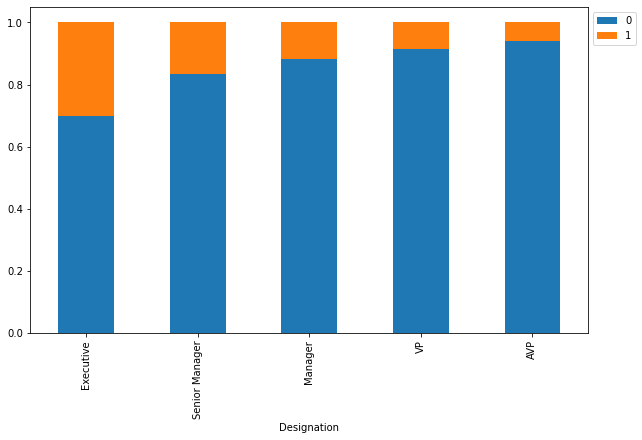

In [96]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "Designation", "ProdTaken")

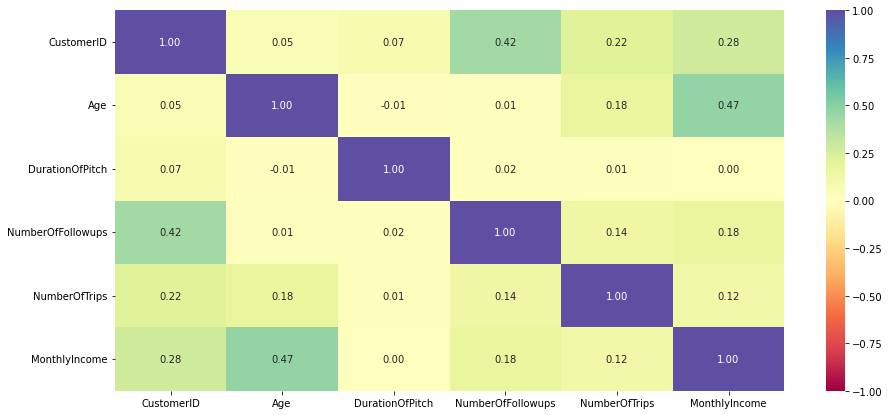

In [97]:
# heatmap for correlation
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

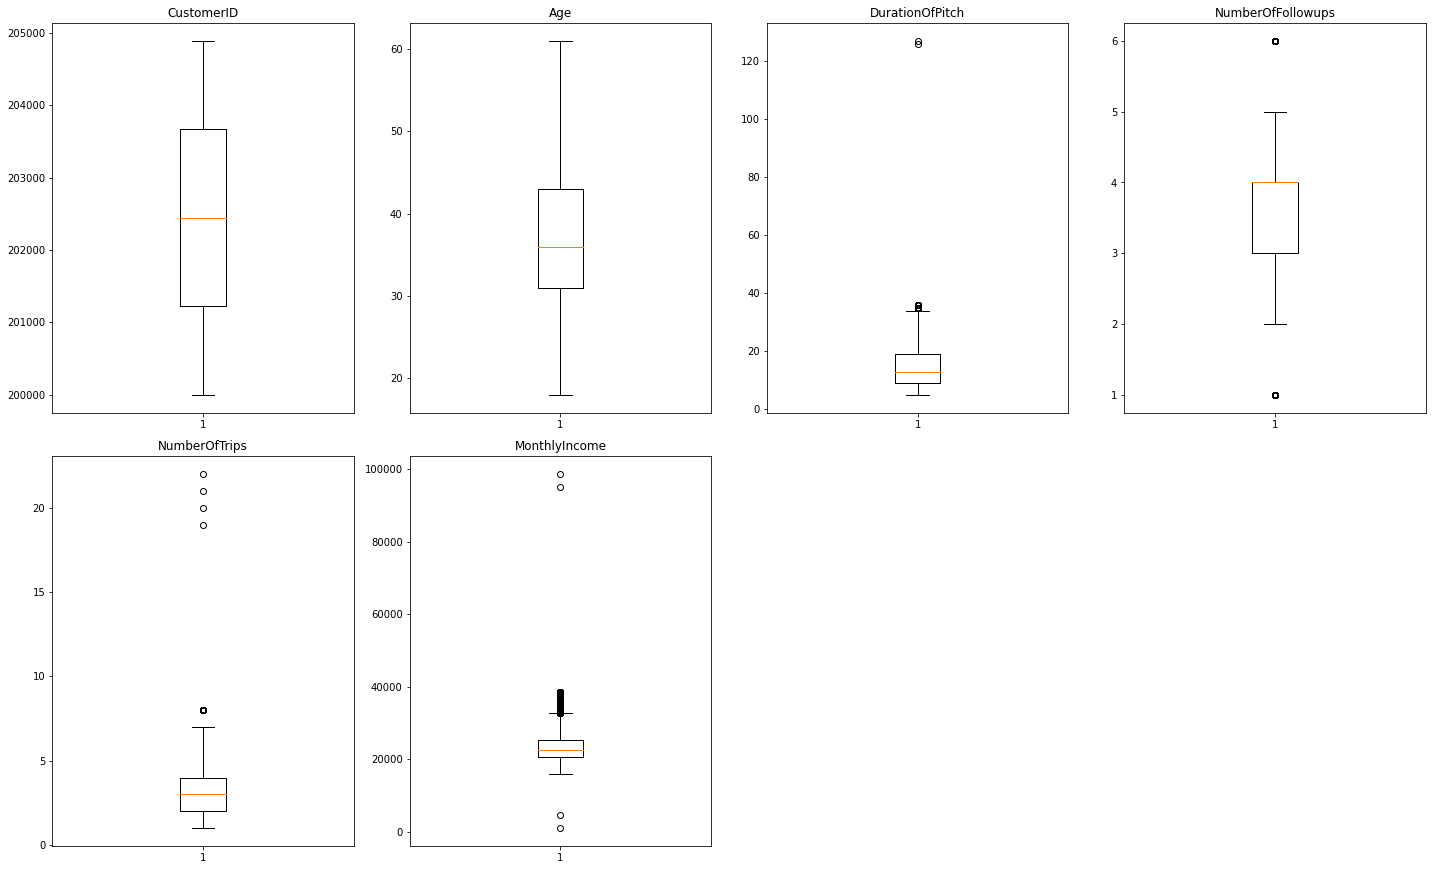

In [98]:
# check the outliers before treating
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [99]:
outlier_num = df.select_dtypes(include=np.number)
 
# find the 25th percentile and 75th percentile.
Q1 = df.quantile(0.25)            
Q3 = df.quantile(0.75)

# Inter Quantile Range (75th percentile - 25th percentile)
IQR = Q3 - Q1                           

# find lower and upper bounds for all values. All values outside these bounds are outliers
lower=Q1-1.5*IQR                        
upper=Q3+1.5*IQR

((outlier_num<lower)|(outlier_num>upper)).sum()/len(df)*100

CustomerID           0.000000
Age                  0.000000
DurationOfPitch      2.291326
NumberOfFollowups    6.382979
NumberOfTrips        2.229951
MonthlyIncome        7.671849
dtype: float64

In [100]:
# split the columns in Dependent and Independent Set
X= df.drop(["CustomerID","ProdTaken","PitchSatisfactionScore","ProductPitched","NumberOfFollowups","DurationOfPitch"],axis=1)
y= df["ProdTaken"]

In [101]:
# use get_dummies function to convert the categorical columns
X = pd.get_dummies(X, drop_first=True)

In [102]:
# splitting data into training and test set, use stratify to maintain the original distribution of Dependent variable as of original set
X_train,X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=25,stratify=y)

# creating a list of column names
feature_names = X_train.columns.to_list()

In [103]:
print("Original ProdTaken True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df["ProdTaken"] == 1]), (len(df.loc[df["ProdTaken"] == 1])/len(df.index)) * 100))
print("Original ProdTaken False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df["ProdTaken"] == 0]), (len(df.loc[df["ProdTaken"] == 0])/len(df.index)) * 100))
print("")
print("Training ProdTaken True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training ProdTaken False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test ProdTaken True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test ProdTaken False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))

Original ProdTaken True Values    : 920 (18.82%)
Original ProdTaken False Values   : 3968 (81.18%)

Training ProdTaken True Values    : 644 (18.82%)
Training ProdTaken False Values   : 2777 (81.18%)

Test ProdTaken True Values        : 276 (18.81%)
Test ProdTaken False Values       : 1191 (81.19%)


In [104]:
# DecistionTreeClassifier with gini and class_weight for appropriate importance
dtc = DecisionTreeClassifier(criterion="gini",class_weight={0:0.15,1:0.85},random_state=1)

# fit the model on training dataset
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [105]:
# check the scores on Training and Testing Datasets
dtc_score = get_metrics_score(dtc)

Accuracy on training set :  1.0
Accuracy on test set :  0.8520790729379687
Recall on training set :  1.0
Recall on test set :  0.6014492753623188
Precision on training set :  1.0
Precision on test set :  0.608058608058608
F1 on training set :  1.0
F1 on test set :  0.6047358834244079


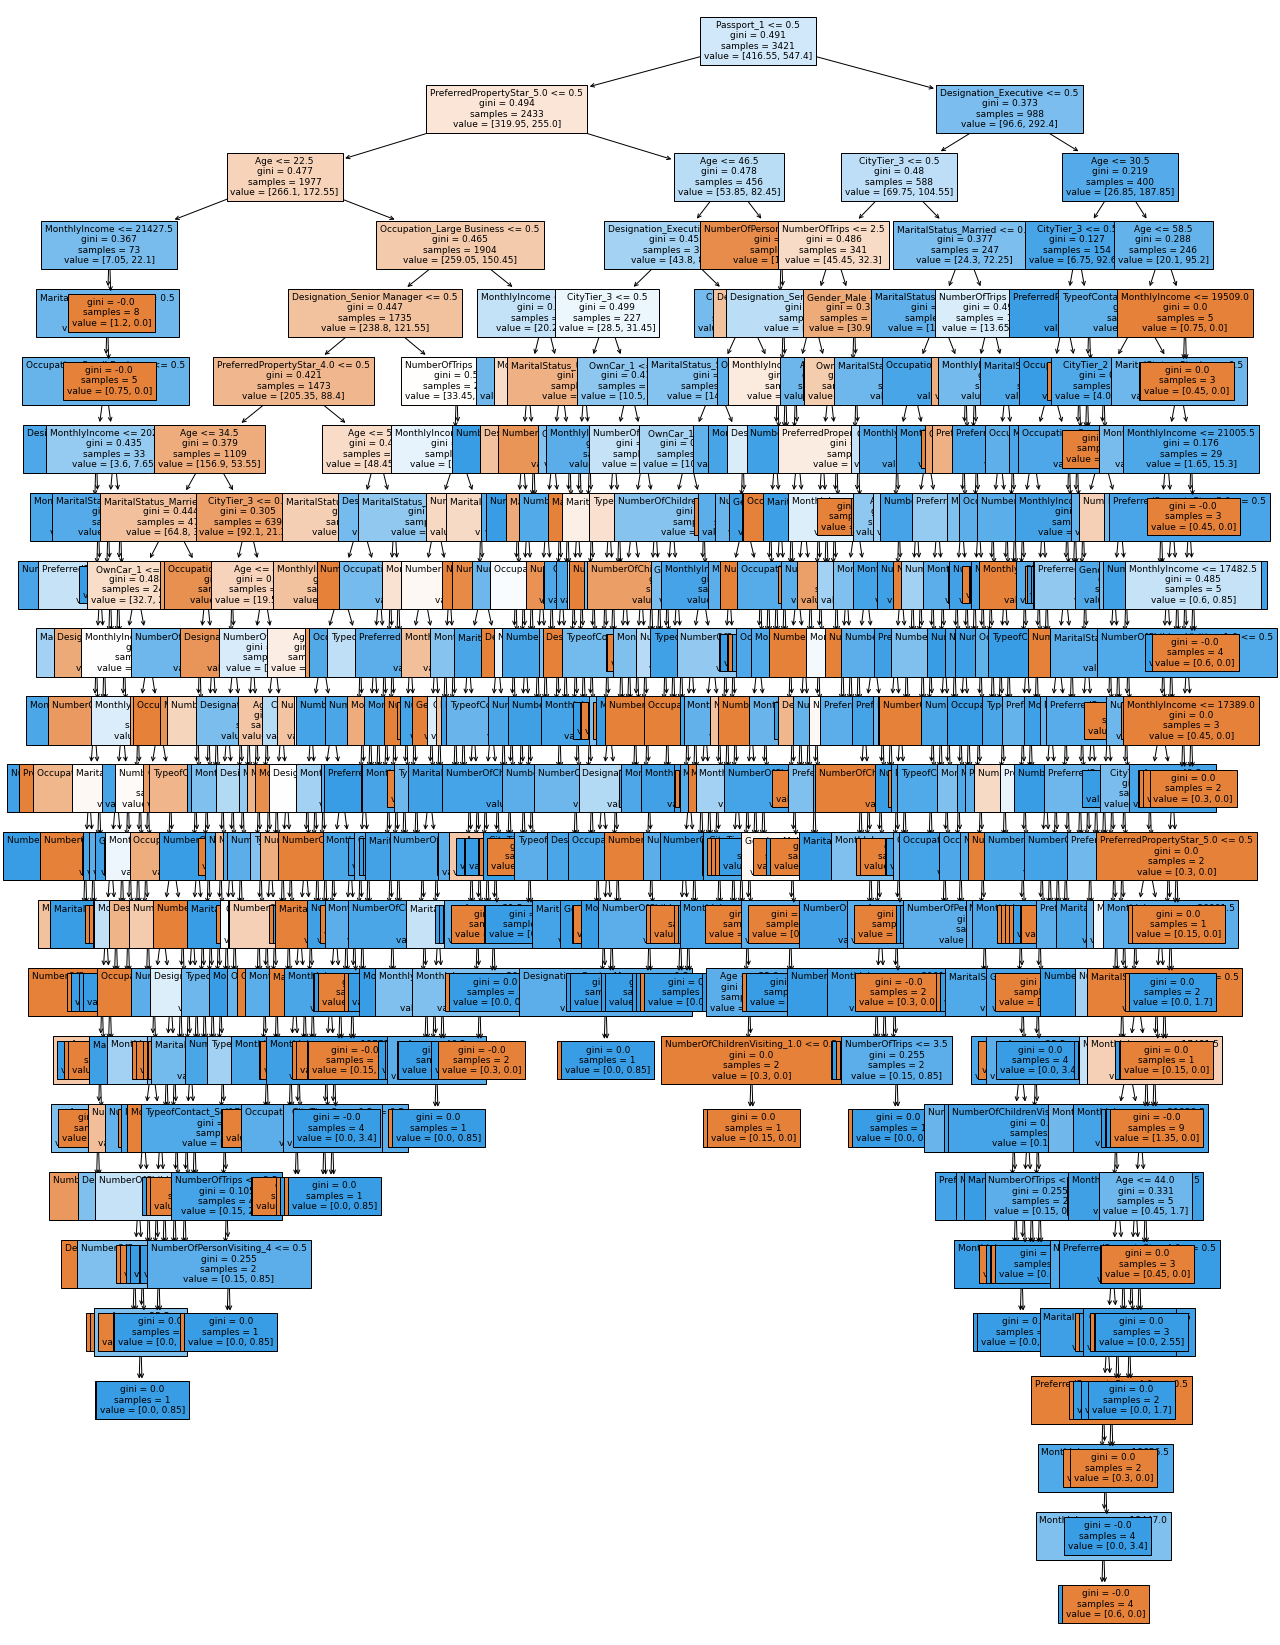

In [106]:
# plot the decision tree
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    dtc,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

plt.show()

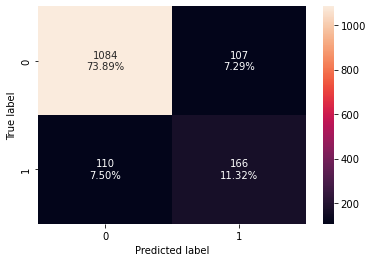

In [107]:
# use draw_matrix function
draw_matrix(dtc, X_test, y_test)

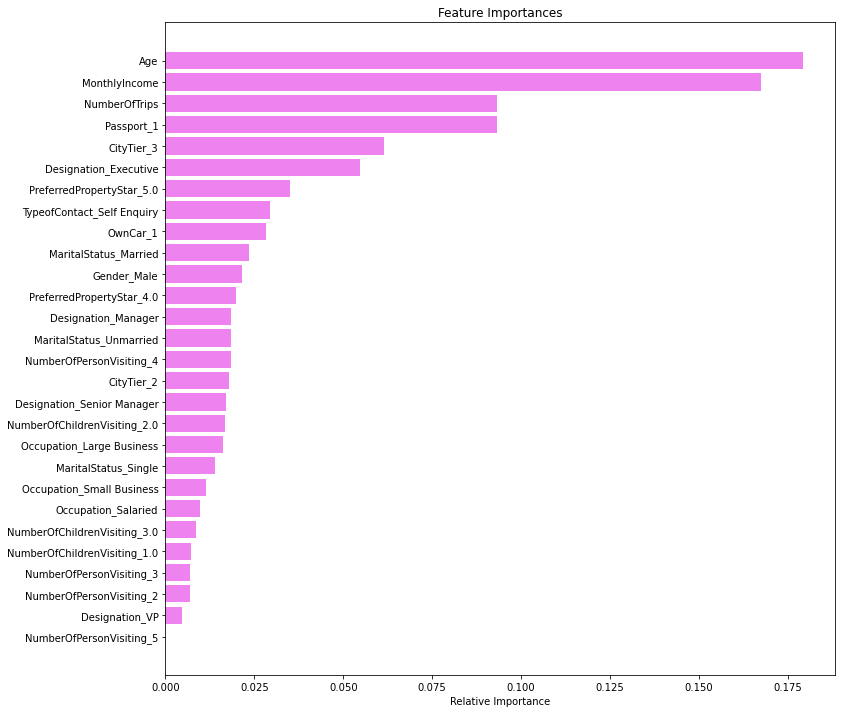

In [108]:
# plot a horizontal bar graph
importances = dtc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [109]:
# choose the type of classifier. 
dtc1 = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85}) #adding classweights 

# defining the Hyperparameters
parameters = {"max_depth": np.arange(10,60,10), 
            "criterion": ["gini","entropy"],
            "min_samples_leaf": [ 2, 5, 7, 10],
            "max_leaf_nodes" : [3, 5, 10,15],}

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# run the grid search with the above parameters
grid_obj = GridSearchCV(dtc1, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# set to the best combination of parameters
dtcht = grid_obj.best_estimator_

# fit the best algorithm to the data. 
dtcht.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=10, max_leaf_nodes=15, min_samples_leaf=2,
                       random_state=1)

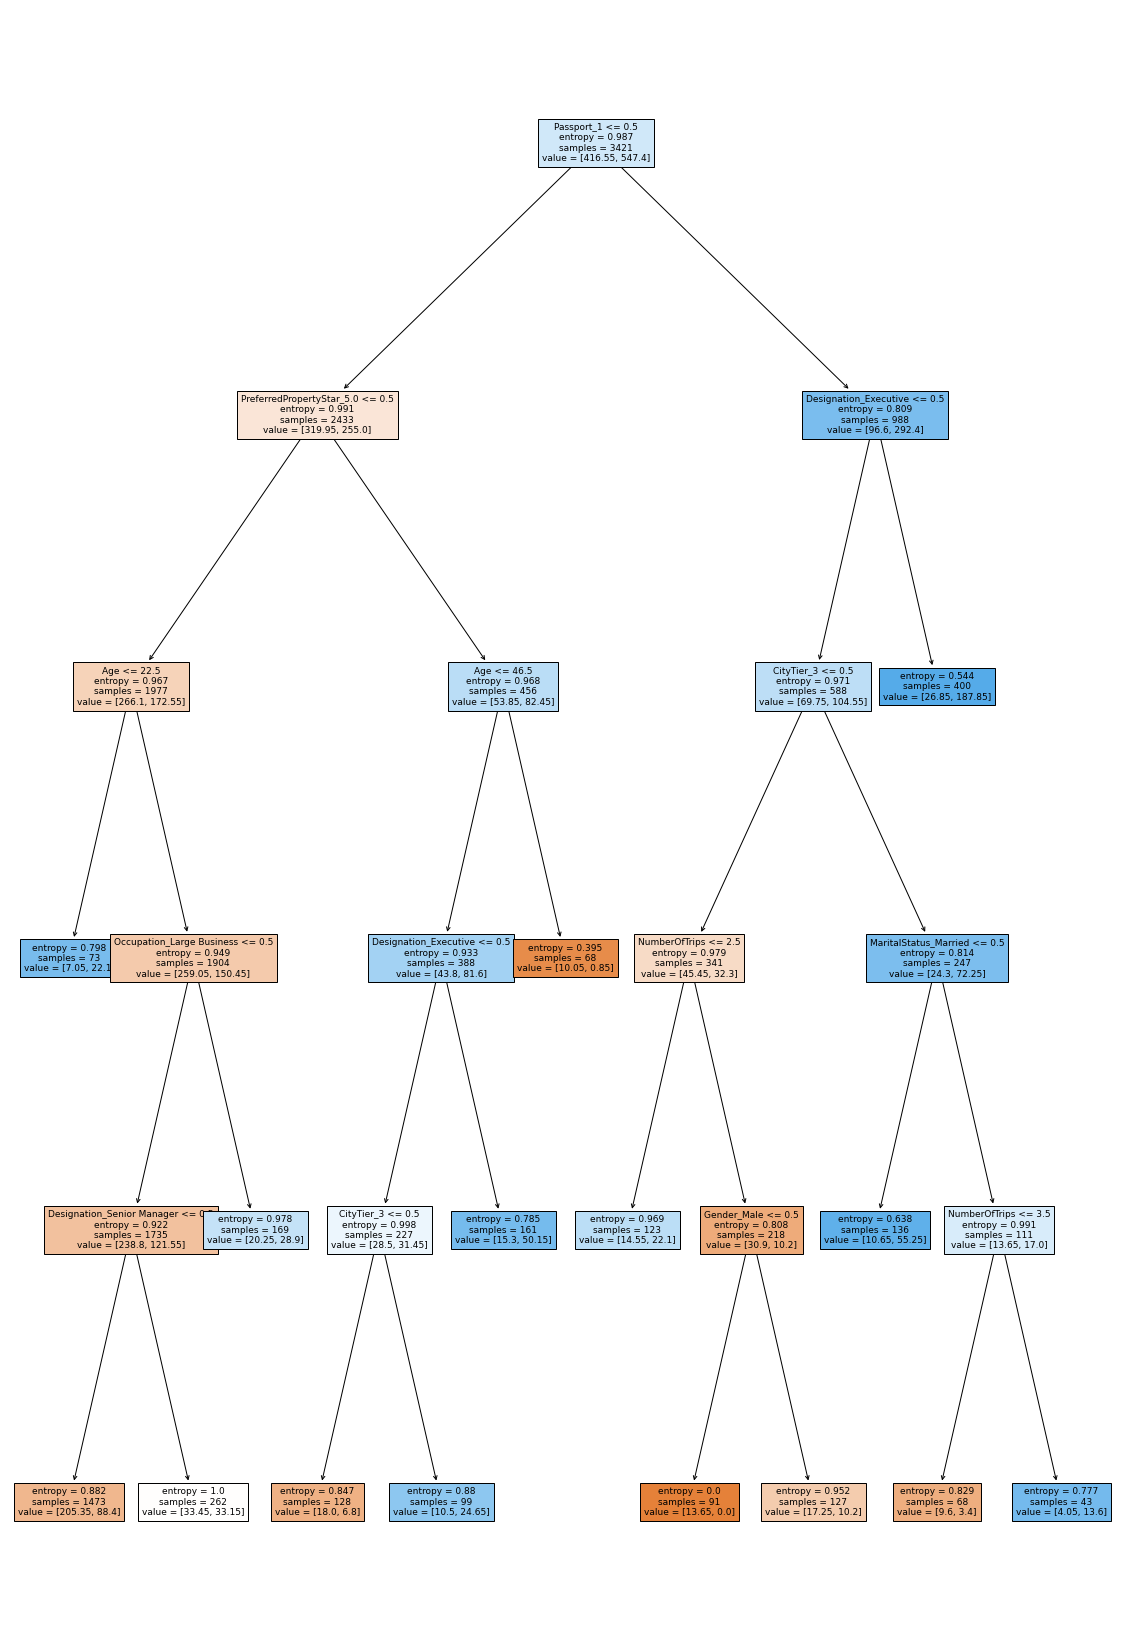

In [110]:
# plot the decision tree
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    dtcht,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

plt.show()

In [111]:
# check the scores on Training and Testing Datasets
dtcht_scores = get_metrics_score(dtcht)

Accuracy on training set :  0.7380882782812044
Accuracy on test set :  0.7307430129516019
Recall on training set :  0.7391304347826086
Recall on test set :  0.6992753623188406
Precision on training set :  0.3953488372093023
Precision on test set :  0.3821782178217822
F1 on training set :  0.5151515151515151
F1 on test set :  0.4942381562099872


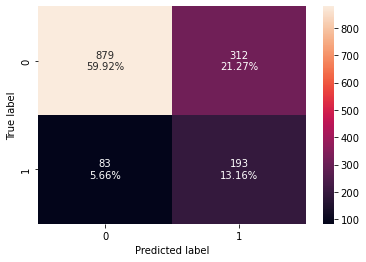

In [112]:
# use draw_matrix function
draw_matrix(dtcht, X_test, y_test)

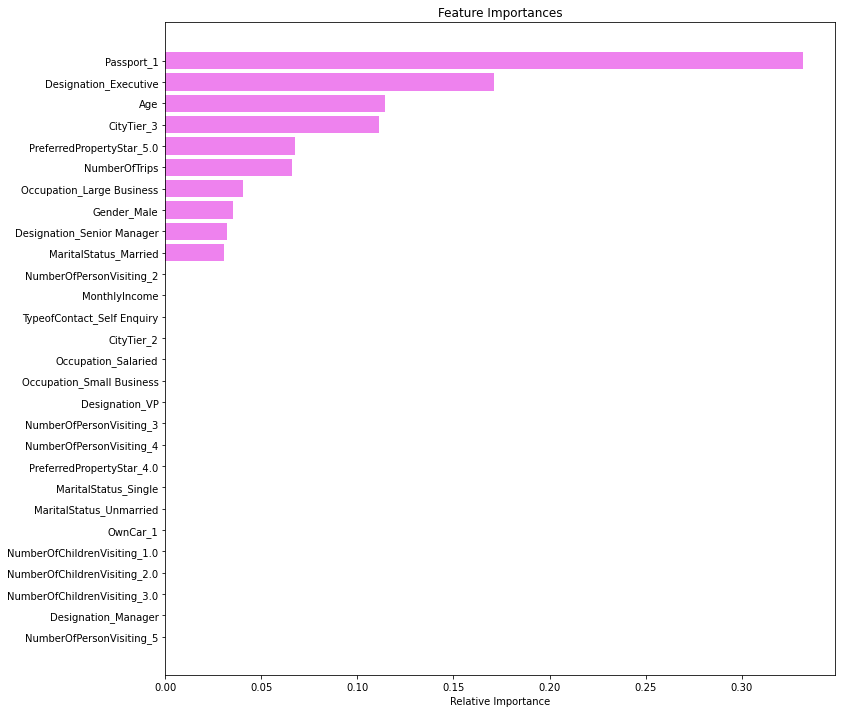

In [113]:
# plot a horizontal bar graph
importances = dtcht.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [114]:
# baggingClassifier
bgc = BaggingClassifier(random_state=1)

# fit the model on training dataset
bgc.fit(X_train, y_train)

BaggingClassifier(random_state=1)

In [115]:
# check the scores on Training and Testing Datasets
bgc_score = get_metrics_score(bgc)

Accuracy on training set :  0.9897690733703596
Accuracy on test set :  0.8888888888888888
Recall on training set :  0.9472049689440993
Recall on test set :  0.5362318840579711
Precision on training set :  0.9983633387888707
Precision on test set :  0.8087431693989071
F1 on training set :  0.9721115537848606
F1 on test set :  0.644880174291939


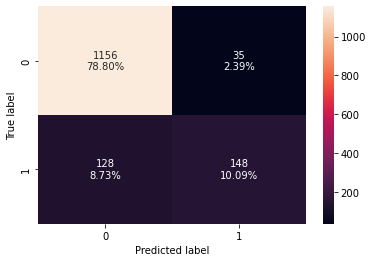

In [116]:
# use draw_matrix function
draw_matrix(bgc, X_test, y_test)

In [117]:
# BaggingClassifier with gini and class_weight for appropriate importance
bgclr = BaggingClassifier(base_estimator=LogisticRegression(solver="liblinear", random_state=1),random_state=1) 

# fit the model on training set
bgclr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

In [118]:
# check the scores on Training and Testing Datasets
bgclr_score = get_metrics_score(bgclr)

Accuracy on training set :  0.8117509500146156
Accuracy on test set :  0.8118609406952966
Recall on training set :  0.0
Recall on test set :  0.0
Precision on training set :  0.0
Precision on test set :  0.0
F1 on training set :  0.0
F1 on test set :  0.0


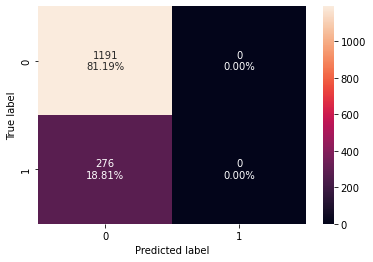

In [119]:
# use draw_matrix function
draw_matrix(bgclr, X_test, y_test)

In [120]:
# BaggingClassifier with gini and class_weight for appropriate importance
bgcdt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="gini",class_weight={0:0.15,1:0.85},random_state=1),random_state=1)

# fit the model on training set
bgcdt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.15,
                                                                      1: 0.85},
                                                        random_state=1),
                  random_state=1)

In [121]:
# check the scores on Training and Testing Datasets
bgcdt_score = get_metrics_score(bgcdt)

Accuracy on training set :  0.9877228880444314
Accuracy on test set :  0.8875255623721882
Recall on training set :  0.9394409937888198
Recall on test set :  0.4855072463768116
Precision on training set :  0.9950657894736842
Precision on test set :  0.8535031847133758
F1 on training set :  0.9664536741214057
F1 on test set :  0.6189376443418014


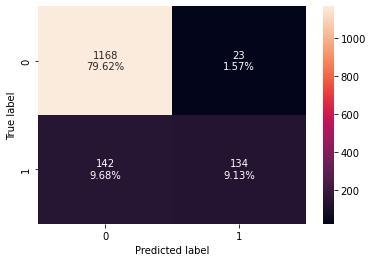

In [122]:
# use draw_matrix function
draw_matrix(bgcdt, X_test, y_test)

In [123]:
# set the parameters
parameters = {
              "n_estimators":np.arange(10,60,10),
              "max_features": [0.7,0.8,0.9],
              "max_samples": [0.7,0.8,0.9], 
             }

# assigning Bootstrap = True to select features with Replacement
bgc1 = BaggingClassifier(random_state=1,bootstrap=True)

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# run the grid search
grid_obj = GridSearchCV(bgc1, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# set the clf to the best combination of parameters
bgcht = grid_obj.best_estimator_

# fit the best algorithm to the data.
bgcht.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

In [124]:
# check the scores on Training and Testing Datasets
bgcht_score = get_metrics_score(bgcht)

Accuracy on training set :  0.9994153756211634
Accuracy on test set :  0.9045671438309475
Recall on training set :  0.9968944099378882
Recall on test set :  0.5688405797101449
Precision on training set :  1.0
Precision on test set :  0.8820224719101124
F1 on training set :  0.9984447900466563
F1 on test set :  0.6916299559471365


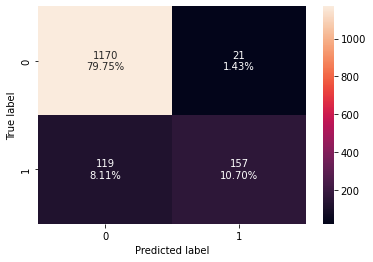

In [125]:
# use draw_matrix function
draw_matrix(bgcht, X_test, y_test)

In [126]:
# random forest classifier
rfc = RandomForestClassifier(random_state=1)

# fit the model on training set
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [127]:
# check the scores on Training and Testing Datasets
rfc_score = get_metrics_score(rfc)

Accuracy on training set :  1.0
Accuracy on test set :  0.8847989093387867
Recall on training set :  1.0
Recall on test set :  0.4492753623188406
Precision on training set :  1.0
Precision on test set :  0.8794326241134752
F1 on training set :  1.0
F1 on test set :  0.5947242206235012


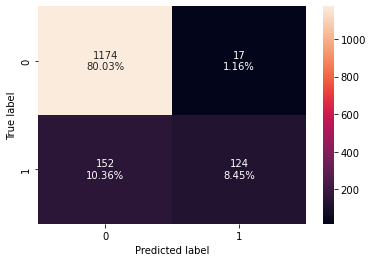

In [128]:
# use draw_matrix function
draw_matrix(rfc, X_test, y_test)

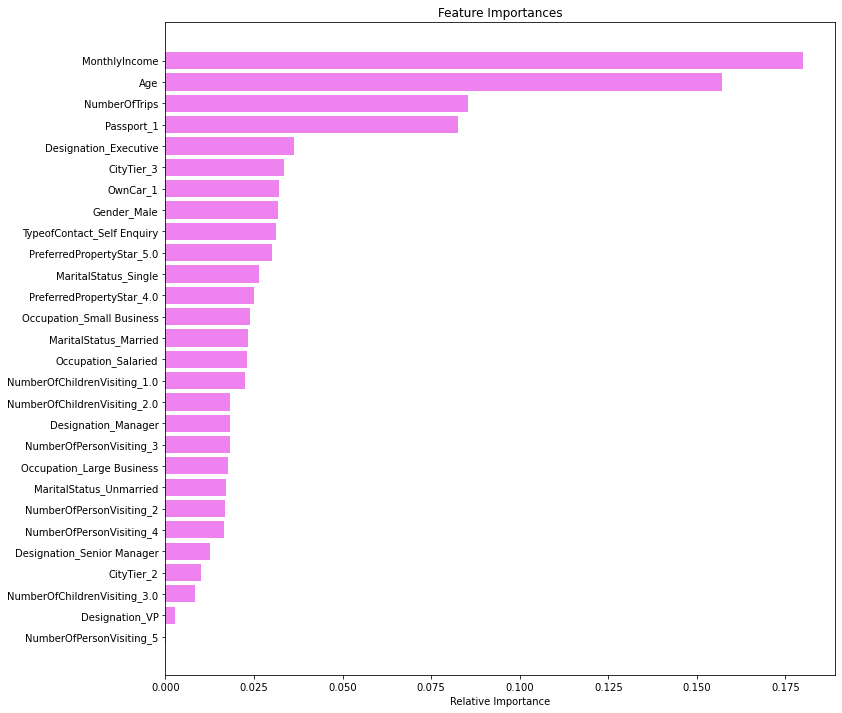

In [129]:
# plot a horizontal bar graph
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [130]:
# random forest classifier 
rfcwt = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=1)

# fit the model on training set
rfcwt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [131]:
# check the scores on Training and Testing Datasets
rfcwt_score = get_metrics_score(rfcwt)

Accuracy on training set :  1.0
Accuracy on test set :  0.8793456032719836
Recall on training set :  1.0
Recall on test set :  0.4166666666666667
Precision on training set :  1.0
Precision on test set :  0.8778625954198473
F1 on training set :  1.0
F1 on test set :  0.5651105651105651


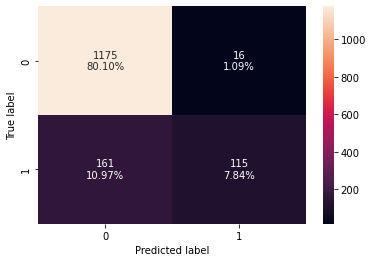

In [132]:
# use data_matrix function
draw_matrix(rfcwt, X_test, y_test)

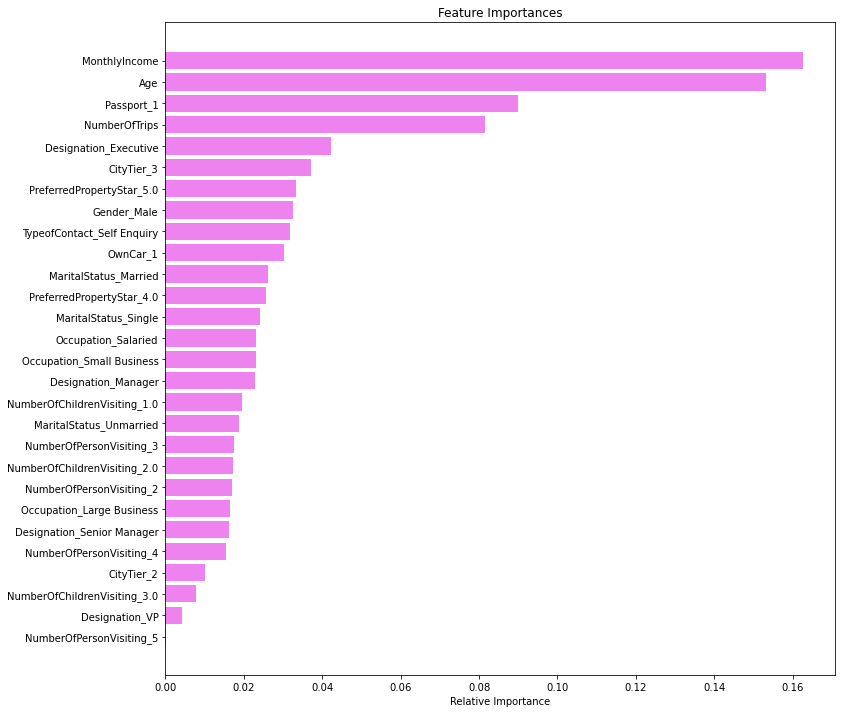

In [133]:
# plot a horizontal bar graph
importances = rfcwt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [134]:
# random forest classifier with weights
rfc1 = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=1)

# grid of parameters to choose from
parameters = {"n_estimators": np.arange(110,251,501),
              "min_samples_leaf": np.arange(1,6,1),
              "max_features":["log2",0.7,0.9,"auto"],
              "max_samples": np.arange(0.3, 0.7, None),
             }

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# run the grid search
grid_obj = GridSearchCV(rfc1, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# set the clf to the best combination of parameters
rfcht = grid_obj.best_estimator_

# fit the best algorithm to the data.
rfcht.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, max_features='log2',
                       max_samples=0.3, min_samples_leaf=4, n_estimators=110,
                       random_state=1)

In [135]:
# check the scores on Training and Testing Datasets
rfcht_score = get_metrics_score(rfcht)

Accuracy on training set :  0.8667056416252558
Accuracy on test set :  0.8513974096796183
Recall on training set :  0.7236024844720497
Recall on test set :  0.5942028985507246
Precision on training set :  0.6263440860215054
Precision on test set :  0.6074074074074074
F1 on training set :  0.6714697406340057
F1 on test set :  0.6007326007326007


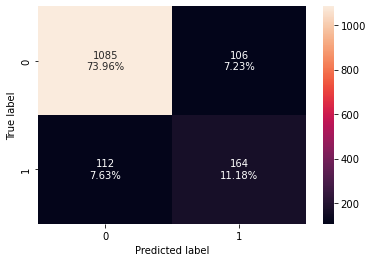

In [136]:
# use draw_matrix function
draw_matrix(rfcht, X_test, y_test)

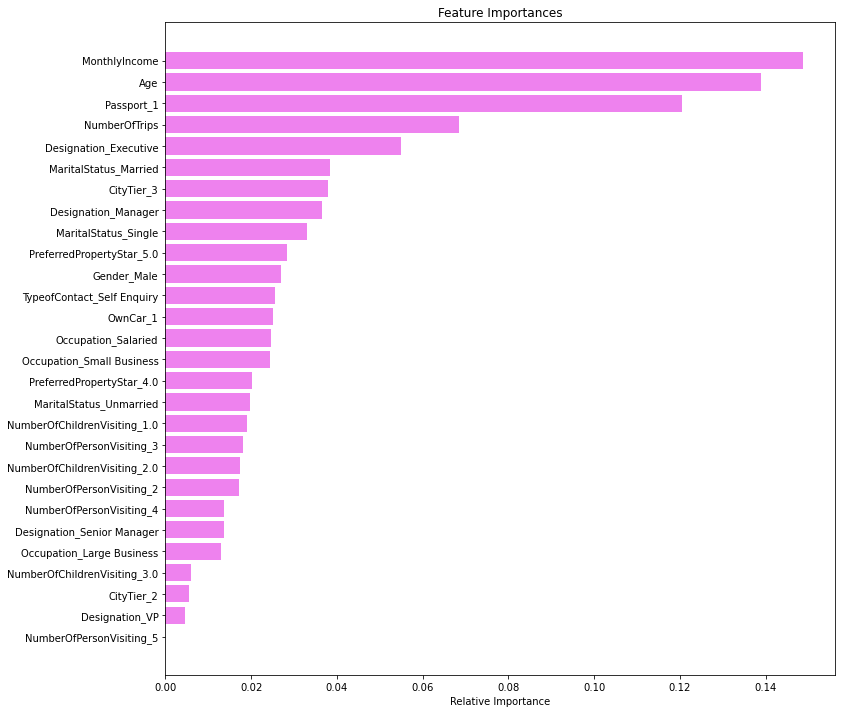

In [137]:
# plot a horizontal bar graph
importances = rfcht.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [138]:
# adaboost classifier
abc = AdaBoostClassifier(random_state=1)

# fit the model on training set
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [139]:
# check the scores on Training and Testing Datasets
abc_score = get_metrics_score(abc)

Accuracy on training set :  0.8351359251680796
Accuracy on test set :  0.8438991138377642
Recall on training set :  0.25
Recall on test set :  0.27898550724637683
Precision on training set :  0.6652892561983471
Precision on test set :  0.719626168224299
F1 on training set :  0.36343115124153497
F1 on test set :  0.402088772845953


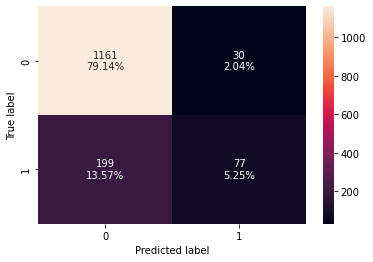

In [140]:
# use draw_matrix function
draw_matrix(abc, X_test, y_test)

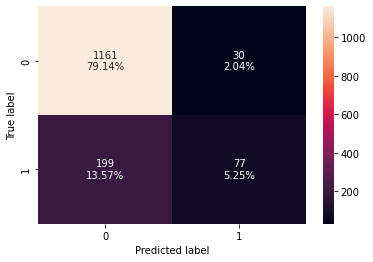

In [141]:
# use draw_matrix function
draw_matrix(abc, X_test, y_test)

In [142]:
# choose the type of classifier. 
abc1 = AdaBoostClassifier(random_state=1)

# grid of parameters to choose from
parameters = {
    #let"s try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1,random_state=1),DecisionTreeClassifier(max_depth=2,random_state=1),
                      DecisionTreeClassifier(max_depth=3,random_state=1)],
    "n_estimators": np.arange(10,60,10),
    "learning_rate": [0.05,0.15,0.45,0.75]
}

# type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# run the grid search
grid_obj = GridSearchCV(abc1, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# set the clf to the best combination of parameters
abcht = grid_obj.best_estimator_

# fit the best algorithm to the data.
abcht.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.75, random_state=1)

In [143]:
# check the scores on Training and Testing Datasets
abcht_score = get_metrics_score(abcht)

Accuracy on training set :  0.9239988307512423
Accuracy on test set :  0.8575323790047716
Recall on training set :  0.6708074534161491
Recall on test set :  0.45652173913043476
Precision on training set :  0.9
Precision on test set :  0.6810810810810811
F1 on training set :  0.7686832740213524
F1 on test set :  0.5466377440347071


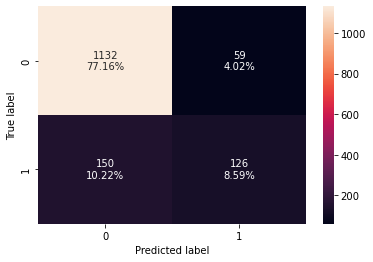

In [144]:
# use draw_matrix function
draw_matrix(abcht, X_test, y_test)

In [145]:
# gradient boost classifier
gbc = GradientBoostingClassifier(random_state=1)

# fit the model on training set
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [146]:
# check the scores on Training and Testing Datasets
gbc_score = get_metrics_score(gbc)

Accuracy on training set :  0.8786904413914061
Accuracy on test set :  0.8711656441717791
Recall on training set :  0.4332298136645963
Recall on test set :  0.3695652173913043
Precision on training set :  0.8480243161094225
Precision on test set :  0.8717948717948718
F1 on training set :  0.5734840698869477
F1 on test set :  0.5190839694656488


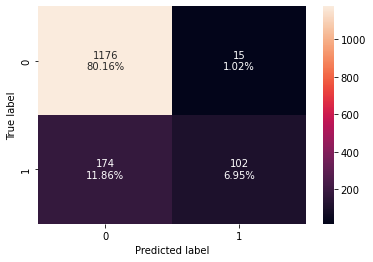

In [147]:
# use draw_matrix function
draw_matrix(gbc, X_test, y_test)

In [148]:
# gradientboostclassifier with adaboost as init model
gbcab = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# fit the model on training set
gbcab.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [149]:
# check the scores on Training and Testing Datasets
gbcab_score = get_metrics_score(gbcab)

Accuracy on training set :  0.8778135048231511
Accuracy on test set :  0.8670756646216768
Recall on training set :  0.42080745341614906
Recall on test set :  0.36231884057971014
Precision on training set :  0.8575949367088608
Precision on test set :  0.8403361344537815
F1 on training set :  0.5645833333333333
F1 on test set :  0.5063291139240507


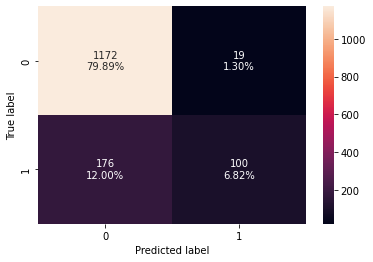

In [150]:
# use draw_matrix function
draw_matrix(gbcab, X_test, y_test)

In [151]:
# Choose the type of classifier. 
gbcab1 = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,60,5),
    "subsample":[0.6,0.7,0.8],
    "max_features":[0.6,0.7,0.8],
    "learning_rate": [0.05,0.15,0.5]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbcab1, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbcht = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbcht.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.5, max_features=0.6, n_estimators=55,
                           random_state=1, subsample=0.8)

In [152]:
# check the scores on Training and Testing Datasets
gbcht_score = get_metrics_score(gbcht)

Accuracy on training set :  0.9073370359543993
Accuracy on test set :  0.8588957055214724
Recall on training set :  0.5854037267080745
Recall on test set :  0.39855072463768115
Precision on training set :  0.882903981264637
Precision on test set :  0.7284768211920529
F1 on training set :  0.704014939309057
F1 on test set :  0.5152224824355971


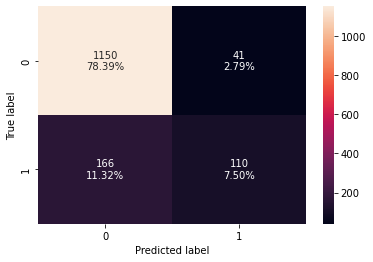

In [153]:
# use draw_matrix function
draw_matrix(gbcht, X_test, y_test)

In [154]:
# xgbclassifier with eval_metric="logloss"
xgbc = XGBClassifier(random_state=1, eval_metric="logloss")

# fit the model on training set
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [155]:
# check the scores on Training and Testing Datasets
xgbc_score = get_metrics_score(xgbc)

Accuracy on training set :  0.9961999415375621
Accuracy on test set :  0.8970688479890934
Recall on training set :  0.9798136645962733
Recall on test set :  0.5688405797101449
Precision on training set :  1.0
Precision on test set :  0.8306878306878307
F1 on training set :  0.9898039215686275
F1 on test set :  0.675268817204301


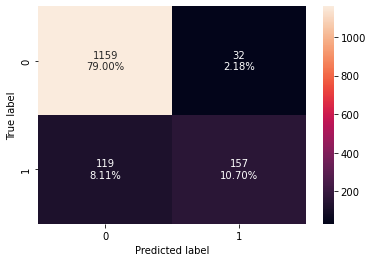

In [156]:
# use draw_matrix function
draw_matrix(xgbc, X_test, y_test)

In [157]:
# choose the classifier
xgbc1 = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,60,10),
    "subsample":[0.6,0.7,0.8],
    "learning_rate":[0.1,0.3,0.55],
    "colsample_bytree":[0.5,0.7,0.9],
    "colsample_bylevel":[0.5,0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgbc1, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgbcht = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgbcht.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.55, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [158]:
# check the scores on Training and Testing Datasets
xgbcht_score = get_metrics_score(xgbcht)

Accuracy on training set :  0.9845074539608302
Accuracy on test set :  0.8766189502385822
Recall on training set :  0.9239130434782609
Recall on test set :  0.5253623188405797
Precision on training set :  0.993322203672788
Precision on test set :  0.7435897435897436
F1 on training set :  0.9573612228479486
F1 on test set :  0.6157112526539279


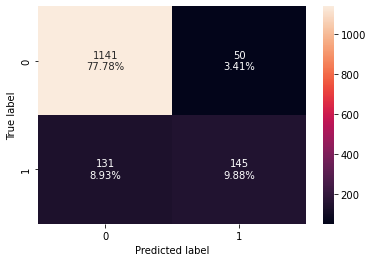

In [159]:
# use draw_matrix function
draw_matrix(xgbcht, X_test, y_test)

In [160]:
# define the estimators for the model
estimators = [("Random Forest",rfcht),("ADA Boosting",abcht),("Decision Tree",dtc)]

# define the final estimator
final_estimator = xgbcht

# choose the classifier
sc= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

# train the model on training set
sc.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.15,
                                                                     1: 0.85},
                                                       max_features='log2',
                                                       max_samples=0.3,
                                                       min_samples_leaf=4,
                                                       n_estimators=110,
                                                       random_state=1)),
                               ('ADA Boosting',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                         random_state=1),
                                                   learning_rate=0.75,
                                                   random_state=1)),
                             

In [161]:
# check the scores on Training and Testing Datasets
sc_score = get_metrics_score(sc)

Accuracy on training set :  0.9368605670856475
Accuracy on test set :  0.8588957055214724
Recall on training set :  0.7624223602484472
Recall on test set :  0.4746376811594203
Precision on training set :  0.8862815884476535
Precision on test set :  0.6787564766839378
F1 on training set :  0.8196994991652755
F1 on test set :  0.55863539445629


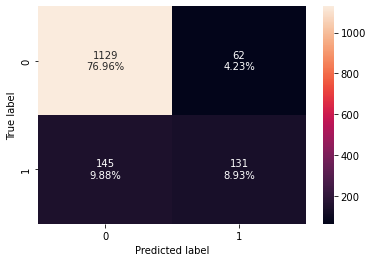

In [162]:
# use draw_matrix function
draw_matrix(sc, X_test, y_test)

In [163]:
# defining list of models
models = [dtc, dtcht, bgc, bgclr, bgcdt, bgcht, rfc, rfcwt, rfcht, abc, abcht, gbc, gbcab, gbcht, xgbc, xgbcht, sc]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the accuracy, f1, recall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_train.append(np.round(j[6],2))
    f1_test.append(np.round(j[7],2))

# create dataframe
comparison_frame = pd.DataFrame({"Model":["Decision Tree", "Decision Tree - Tuned", "Bagging", "Bagging - Tuned", "Bagging - Linear Regression",
                                          "Bagging - Decision Tree", "Random Forest", "Random Forest - Weights",
                                          "Random Forest - Tuned", "ADA Boost", "ADA Boost - Tuned", "Gradient Boost", 
                                          "Gradient Boost - ADA Boost", "Gradient Boost - Tuned", "XG boost", "XG Boost - Tuned", "Stacking"], 
                                          "Accuracy - Train": acc_train, "Accuracy - Test": acc_test,
                                          "Recall - Train": recall_train,"Recall - Test": recall_test,
                                          "Precision - Train": precision_train,"Precision - Test" :precision_test,
                                          "F1 - Train": f1_train,"F1 - Test": f1_test}) 
comparison_frame

,Model,Accuracy - Train,Accuracy - Test,Recall - Train,Recall - Test,Precision - Train,Precision - Test,F1 - Train,F1 - Test
0,Decision Tree,1.00,0.85,1.00,0.60,1.00,0.61,1.00,0.60
1,Decision Tree - Tuned,0.74,0.73,0.74,0.70,0.40,0.38,0.52,0.49
2,Bagging,0.99,0.89,0.95,0.54,1.00,0.81,0.97,0.64
3,Bagging - Tuned,0.81,0.81,0.00,0.00,0.00,0.00,0.00,0.00
4,Bagging - Linear Regression,0.99,0.89,0.94,0.49,1.00,0.85,0.97,0.62
5,Bagging - Decision Tree,1.00,0.90,1.00,0.57,1.00,0.88,1.00,0.69
6,Random Forest,1.00,0.88,1.00,0.45,1.00,0.88,1.00,0.59
7,Random Forest - Weights,1.00,0.88,1.00,0.42,1.00,0.88,1.00,0.57
8,Random Forest - Tuned,0.87,0.85,0.72,0.59,0.63,0.61,0.67,0.60
9,ADA Boost,0.84,0.84,0.25,0.28,0.67,0.72,0.36,0.40
